# Mushrooms

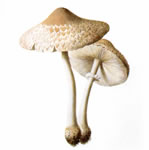

We all love mushrooms (not really).

By: James Nesfield

Date: 3/2/2023

Purpose: Import, Review and Model mushroom data from the UCI data repository for a personal project.

Data: https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

Data Explanation: https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names

The point of this exercise is to build a classifier that can tell us if a mushroom is poisionous or not.

Lets follow the CRISP method here.

## Step 1: Business Understanding - Imagine a hypothetical situation where a business wants to be able to classify mushrooms it can purchase as poisionous or not. Because no one wants a pizza that may kill you... well...

## Step 2: Data Understanding....

(i also do data prep with data understanding!)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import urllib.request  # the lib that handles the url stuff

target_url = r'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names'


for line in urllib.request.urlopen(target_url):
    print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is


1. Title: Mushroom Database



2. Sources: 

    (a) Mushroom records drawn from The Audubon Society Field Guide to North

        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred

        A. Knopf

    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)

    (c) Date: 27 April 1987



3. Past Usage:

    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational

       Adjustment (Technical Report 87-19).  Doctoral disseration, Department

       of Information and Computer Science, University of California, Irvine.

       --- STAGGER: asymptoted to 95% classification accuracy after reviewing

           1000 instances.

    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity

       and Coverage in Incremental Concept Learning. In Proceedings of 

       the 5th International Conference on Machine Learning, 73-79.

       Ann Arbor, Michigan: Morgan Kaufmann.  

       -- approximately the same results with their HILLARY algor

From the above we can see that our data file has no header and that column names are listed in the file.

We can also see some statistics on the distribution of classes which seems fairly even (thankfully).

We also see some basic rules for determination of if a mushroom is poisionous or not which can serve as a baseline if we build a model.

Try to not pay too much attention to those as it is cheating! Just kidding - we can consider this a subject matter expert's insight into the problem which may (and may not as is often the case) tell us something about what is heuristically known about the problem space.


In [3]:
columns = (['edible', 'cap_shape','cap_surface','cap_color',
            'bruises','odor','gill_attachment','gill_spacing',
            'gill_size','gill_color','stalk_shape','stalk_root',
            'stalk_surface_above_ring','stalk_surface_below_ring',
            'stalk_color_above_ring','stalk_color_below_ring',
            'vein_type','vein_color','ring_number','ring_type',
            'spore_print_color','population','habitat'])           


In [4]:
#read in csv
mushroom_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header = None)

mushroom_df.columns = columns


In [5]:
mushroom_df


edible cap_shape cap_surface cap_color bruises odor gill_attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   
...     ...       ...         ...       ...     ...  ...             ...   
8119      e         k           s         n       f    n               a   
8120      e         x           s         n       f    n               a   
8121      e         f           s         n       f    n               a   
8122      p         k           y         n       f    y               f   
8123      e         x           s         n       f    n               a   

     gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk_color_above_ring stalk_color_below_ring vein_type vein_color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring_number ring_type spore_print_color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

## immediately split data

Here is a fun thought to consider.......

We cant do eda right away as we will unintentionally produce data leakage, thus we have to split the data asap.

Watch this real fast to understand why: https://youtu.be/lIFLeHDanmA?t=4151

We will use a 3 split set of train, test, and validate to try a few things out. 

We will split with a 50, 25, 25 split.

There is a problem here though that we can prepare our data for proactively...

We know that the data is all categorical and is encoded with letters where we can go and encode these to prevent issues down stream.
 We have this information up front so we can manage it now proactively much like we would when we design a data base table with input controls.

Generally what we will end up with is a categorical encoding that is numeric in sturcture.

Because all of this data is categorical we will need to pursue tree based models as the data is nor ordinal in structure.

One hot encoding is another option, however its not great with tree based models:

https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

In [6]:
#split x's and y'x
X = mushroom_df.drop('edible', axis = 1)
Y = mushroom_df['edible']

#make Y binary
#edible (e) == 0
#poisionous (p) == 1
Y_bin = (Y == 'p')

In [7]:
#encode x's using sklearn OrdinalEncoder
# we need to fit then transform here as doing it with the fit_transform one shot will ruin our ability to deploy
#by doing fit then transform we enable the fitted encoder to be used later
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

ord_enc.fit(X[columns[1:]])

print(ord_enc.categories_)

X_enc = ord_enc.transform(X[columns[1:]])

#save ord_enc for later if you need to deploy!
        
#also fun to note is you may not have this data in your x's and may need to manually encode where you should look here for tips:
#https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/
    

[array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object), array(['f', 'g', 's', 'y'], dtype=object), array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object), array(['f', 't'], dtype=object), array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object), array(['a', 'f'], dtype=object), array(['c', 'w'], dtype=object), array(['b', 'n'], dtype=object), array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'],
      dtype=object), array(['e', 't'], dtype=object), array(['?', 'b', 'c', 'e', 'r'], dtype=object), array(['f', 'k', 's', 'y'], dtype=object), array(['f', 'k', 's', 'y'], dtype=object), array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object), array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object), array(['p'], dtype=object), array(['n', 'o', 'w', 'y'], dtype=object), array(['n', 'o', 't'], dtype=object), array(['e', 'f', 'l', 'n', 'p'], dtype=object), array(['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'], dtype=object), array(['a', '

In [8]:
X.head()

cap_shape cap_surface cap_color bruises odor gill_attachment gill_spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill_size gill_color stalk_shape  ... stalk_surface_below_ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk_color_above_ring stalk_color_below_ring vein_type vein_color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring_number ring_type spore_print_color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 22 columns]

In [9]:
X_enc = pd.DataFrame(data = X_enc, columns = columns[1:])

X_enc.head()

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0        5.0          2.0        4.0      1.0   6.0              1.0   
1        5.0          2.0        9.0      1.0   0.0              1.0   
2        0.0          2.0        8.0      1.0   3.0              1.0   
3        5.0          3.0        8.0      1.0   6.0              1.0   
4        5.0          2.0        3.0      0.0   5.0              1.0   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0           0.0        1.0         4.0          0.0  ...   
1           0.0        0.0         4.0          0.0  ...   
2           0.0        0.0         5.0          0.0  ...   
3           0.0        1.0         5.0          0.0  ...   
4           1.0        0.0         4.0          1.0  ...   

   stalk_surface_below_ring  stalk_color_above_ring  stalk_color_below_ring  \
0                       2.0                     7.0                     7.0   
1                       2.0                     7.0                     7.0   
2                       2.0                     7.0                     7.0   
3                       2.0                     7.0                     7.0   
4                       2.0                     7.0                     7.0   

   vein_type  vein_color  ring_number  ring_type  spore_print_color  \
0        0.0         2.0          1.0        4.0                2.0   
1        0.0         2.0          1.0        4.0                3.0   
2        0.0         2.0          1.0        4.0                3.0   
3        0.0         2.0          1.0        4.0                2.0   
4        0.0         2.0          1.0        0.0                3.0   

   population  habitat  
0         3.0      5.0  
1         2.0      1.0  
2         2.0      3.0  
3         3.0      5.0  
4         0.0      1.0  

[5 rows x 22 columns]

Now we can split our data as discussed above.

In [10]:
from sklearn.model_selection import train_test_split

#split train
#stratify using Y_bin
X_train, X_temp, y_train, y_temp = train_test_split(X_enc, Y_bin, test_size = .50, stratify = Y_bin)

#split validation and 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = .50, stratify = y_temp)

## Data Exploration

We will use pandas profiling to review the data quickly, this will tell us alot about what we can see in our train data that will lead to data preparation.

Pnadas profiling with a few lines of code will give us a lot of descriptive analytics around our data.

https://pypi.org/project/pandas-profiling/

This has had some updates lately so dont rely 100% on my code here, and do some research yourself at the code git repo here:

https://github.com/ydataai/ydata-profiling

In [11]:
!pip install pandas-profiling

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [12]:
from ydata_profiling import ProfileReport


In [13]:
#mash data back together for a minute
X_train['edible'] = y_train

#profile data
profile = ProfileReport(X_train, title="Shroom Report")

#HTML report can be directly embedded in a cell
profile.to_notebook_iframe()



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
X_train = X_train.drop('edible', axis = 1)

no really huge data issues jump out at me here@

## 3. Modeling

In [15]:
!pip install hyperopt

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [16]:
import xgboost as xgb
import numpy as np
from hyperopt import STATUS_OK, SparkTrials, Trials, fmin, hp, tpe, space_eval

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score

def objective(params):
    """Objective function for Logistic Regression Hyperparameter Tuning"""

    # Perform n_fold cross validation with hyperparameters
    # Use early stopping and evaluate based on ROC AUC

    print(params)
    clf_xgb = xgb.XGBClassifier(**params, objective='binary:logistic')
    scores = cross_val_score(clf_xgb, x_train, y_train, cv=5, scoring='roc_auc')

    # Extract the best score
    best_score = max(scores)

    # Loss must be minimized
    loss = 1 - best_score

    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK} 


In [18]:
#define the scale on positive weights
#because we want to detect poisionous mushrooms we should set this slightly higher  than one
#the cost of saying a mushroom is poisionous when it is not is not as high 
# as the converse where we could get some one hurt
scale_pos_weight = 2

#define search space
space = ({'n_estimators': hp.randint('n_estimators', 100),
          'eta': hp.uniform('eta',.001,.5),
          'learning_rate': hp.uniform('learning_rate',.001,.5),
          'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
          'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
          'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
          'gamma': hp.uniform('gamma', 0.5, 1),
          'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
          'num_parallel_tree': hp.choice('num_parallel_tree', np.arange(1, 14, dtype=int)),
          'scale_pos_weight': int(scale_pos_weight)
         })


In [19]:
#constants
N_FOLDS = 5
MAX_EVALS = 25



In [20]:
#x train sub
x_train = X_train

# Algorithm
tpe_algorithm = tpe.suggest

# Trials object to track progress
spark_bayes_trials = Trials()

# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = MAX_EVALS, trials = spark_bayes_trials)


{'colsample_bytree': 0.8, 'eta': 0.20477704189719706, 'gamma': 0.962718284545129, 'learning_rate': 0.055594072498440554, 'max_depth': 4, 'min_child_weight': 1.0, 'n_estimators': 13, 'num_parallel_tree': 10, 'scale_pos_weight': 2, 'subsample': 0.8500000000000001}
{'colsample_bytree': 0.8, 'eta': 0.3721197707815542, 'gamma': 0.9262391078443366, 'learning_rate': 0.0031446894141858137, 'max_depth': 5, 'min_child_weight': 3.0, 'n_estimators': 84, 'num_parallel_tree': 9, 'scale_pos_weight': 2, 'subsample': 0.8500000000000001}
{'colsample_bytree': 0.5, 'eta': 0.23028989359202023, 'gamma': 0.8592672977591518, 'learning_rate': 0.23452331072539548, 'max_depth': 5, 'min_child_weight': 1.0, 'n_estimators': 52, 'num_parallel_tree': 7, 'scale_pos_weight': 2, 'subsample': 0.9}
{'colsample_bytree': 0.8, 'eta': 0.24900437471221482, 'gamma': 0.6995583645000011, 'learning_rate': 0.23091605018762992, 'max_depth': 5, 'min_child_weight': 2.0, 'n_estimators': 94, 'num_parallel_tree': 2, 'scale_pos_weight': 2

In [21]:
#get best params
best_params = space_eval(space, best)

print(best_params)

{'colsample_bytree': 0.9, 'eta': 0.045421839201059376, 'gamma': 0.9993201741503406, 'learning_rate': 0.28145415679334107, 'max_depth': 7, 'min_child_weight': 4.0, 'n_estimators': 43, 'num_parallel_tree': 10, 'scale_pos_weight': 2, 'subsample': 0.8500000000000001}


In [22]:
clf_xgb = xgb.XGBClassifier(**best_params, objective='binary:logistic')
clf_xgb.fit(X=X_train, y=y_train)



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.045421839201059376, eval_metric=None, feature_types=None,
              gamma=0.9993201741503406, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.28145415679334107, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=4.0, missing=nan,
              monotone_constraints='()', n_estimators=43, n_jobs=0,
              num_parallel_tree=10, predictor='auto', ...)

# 5.validation

using the test data we want to validate our model



In [23]:
def binary_performances(y_true, y_prob, thresh=0.5, labels=['Positives','Negatives']):
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, auc, roc_curve
    
    shape = y_prob.shape
    if len(shape) > 1:
        if shape[1] > 2:
            raise ValueError('A binary class problem is required')
        else:
            y_prob = y_prob[:,1]
    
    plt.figure(figsize=[15,4])
    
    #1 -- Confusion matrix
    cm = confusion_matrix(y_true, (y_prob>thresh).astype(int))
    
    plt.subplot(131)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                     annot_kws={"size": 14}, fmt='g')
    cmlabels = ['True Negatives', 'False Positives',
               'False Negatives', 'True Positives']
    for i,t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])
    plt.title('Confusion Matrix', size=15)
    plt.xlabel('Predicted Values', size=13)
    plt.ylabel('True Values', size=13)
      
    #2 -- Distributions of Predicted Probabilities of both classes
    plt.subplot(132)
    plt.hist(y_prob[y_true==1], density=True, bins=25,
             alpha=.5, color='green',  label=labels[0])
    plt.hist(y_prob[y_true==0], density=True, bins=25,
             alpha=.5, color='red', label=labels[1])
    plt.axvline(thresh, color='blue', linestyle='--', label='Boundary')
    plt.xlim([0,1])
    plt.title('Distributions of Predictions', size=15)
    plt.xlabel('Positive Probability (predicted)', size=13)
    plt.ylabel('Samples (normalized scale)', size=13)
    plt.legend(loc="upper right")
    
    #3 -- ROC curve with annotated decision point
    fp_rates, tp_rates, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fp_rates, tp_rates)
    plt.subplot(133)
    plt.plot(fp_rates, tp_rates, color='orange',
             lw=1, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], lw=1, linestyle='--', color='grey')
    tn, fp, fn, tp = [i for i in cm.ravel()]
    plt.plot(fp/(fp+tn), tp/(tp+fn), 'bo', markersize=8, label='Decision Point')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)
    plt.title('ROC Curve', size=15)
    plt.legend(loc="lower right")
    plt.subplots_adjust(wspace=.3)
    plt.show()

    tn, fp, fn, tp = [i for i in cm.ravel()]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2*(precision * recall) / (precision + recall)
    results = {
        "Precision": precision, "Recall": recall,
        "F1 Score": F1, "AUC": roc_auc
    }
    
    prints = [f"{kpi}: {round(score, 3)}" for kpi,score in results.items()]
    prints = ' | '.join(prints)
    print(prints)
    
    return roc_auc


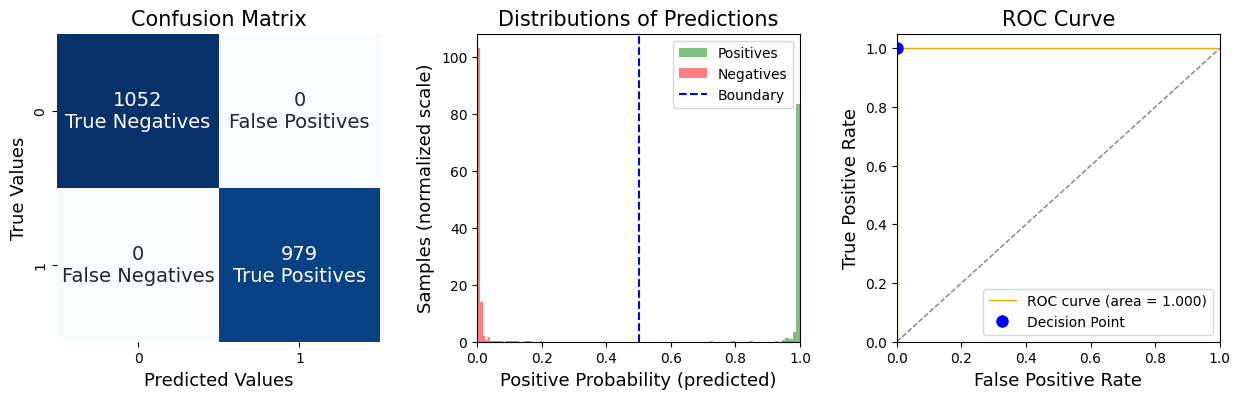

Precision: 1.0 | Recall: 1.0 | F1 Score: 1.0 | AUC: 1.0


In [24]:
y_pred = clf_xgb.predict(X_test)
y_prob = clf_xgb.predict_proba(X_test)

orig_auc = binary_performances(y_test, y_prob)



# Amazing!
Usually this does not happen with models where there is a clean signal to be pulled out!

however we can do better!

lets try to use shap to reduce the number of features!

In [25]:
!pip install shap

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


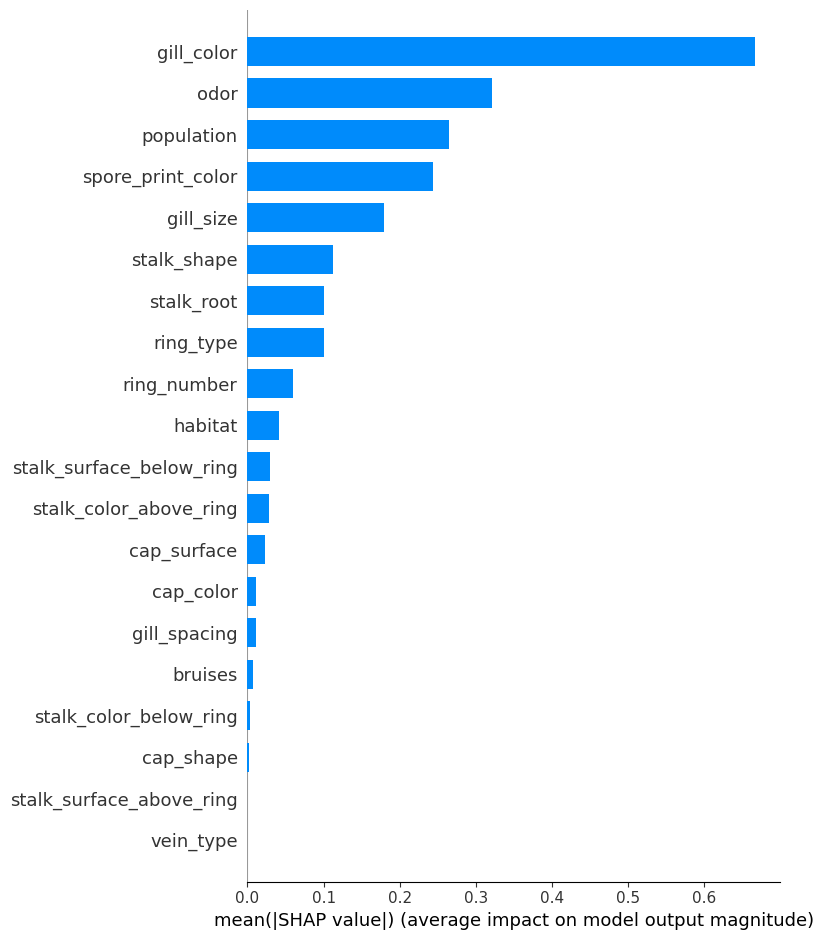

In [26]:
import shap


explainer = shap.TreeExplainer(clf_xgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, feature_names = X_test.columns.tolist(), plot_type = 'bar')


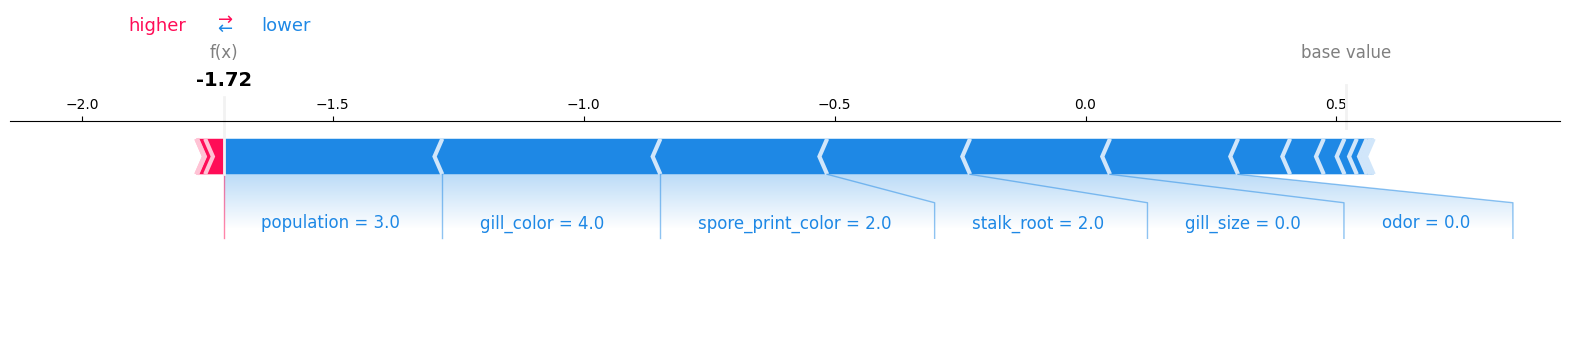

In [27]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], matplotlib=True, show=True)

In [28]:
n_feat = 15

vals = np.abs(shap_values).mean(0)
feature_names = X_test.columns.tolist()

feat_importance = pd.DataFrame(data = list(zip(feature_names, vals)), columns = ['feature_name','shap_value'])

feat_importance.sort_values(by = 'shap_value', ascending = False, inplace = True)

important_features = feat_importance.feature_name.head(n_feat).to_list()

print(important_features)

#subset xtrain
X_train = X_train[important_features]

['gill_color', 'odor', 'population', 'spore_print_color', 'gill_size', 'stalk_shape', 'stalk_root', 'ring_type', 'ring_number', 'habitat', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'cap_surface', 'cap_color', 'gill_spacing']


In [29]:
use#x train sub
x_train = X_train[important_features]

# Algorithm
tpe_algorithm = tpe.suggest

# Trials object to track progress
spark_bayes_trials = Trials()

# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = MAX_EVALS, trials = spark_bayes_trials)


{'colsample_bytree': 0.75, 'eta': 0.05225493234033021, 'gamma': 0.7841789432249855, 'learning_rate': 0.2327924833244096, 'max_depth': 11, 'min_child_weight': 4.0, 'n_estimators': 4, 'num_parallel_tree': 4, 'scale_pos_weight': 2, 'subsample': 0.8500000000000001}
{'colsample_bytree': 0.65, 'eta': 0.16322626317202413, 'gamma': 0.6521611780136864, 'learning_rate': 0.3140058512230334, 'max_depth': 9, 'min_child_weight': 1.0, 'n_estimators': 37, 'num_parallel_tree': 5, 'scale_pos_weight': 2, 'subsample': 0.65}
{'colsample_bytree': 0.6000000000000001, 'eta': 0.2890810359150717, 'gamma': 0.7183369505603907, 'learning_rate': 0.2407350613179659, 'max_depth': 13, 'min_child_weight': 4.0, 'n_estimators': 72, 'num_parallel_tree': 4, 'scale_pos_weight': 2, 'subsample': 0.6000000000000001}
{'colsample_bytree': 0.8500000000000001, 'eta': 0.43560532352401293, 'gamma': 0.8868656780363158, 'learning_rate': 0.09622607360507122, 'max_depth': 12, 'min_child_weight': 1.0, 'n_estimators': 19, 'num_parallel_tr

In [30]:
#get best params
best_params_2 = space_eval(space, best)

print(best_params_2)

{'colsample_bytree': 0.75, 'eta': 0.05225493234033021, 'gamma': 0.7841789432249855, 'learning_rate': 0.2327924833244096, 'max_depth': 11, 'min_child_weight': 4.0, 'n_estimators': 4, 'num_parallel_tree': 4, 'scale_pos_weight': 2, 'subsample': 0.8500000000000001}


In [31]:
clf_xgb = xgb.XGBClassifier(**best_params_2, objective='binary:logistic')
clf_xgb.fit(X=X_train, y=y_train)



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.75,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.05225493234033021, eval_metric=None, feature_types=None,
              gamma=0.7841789432249855, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2327924833244096, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=11, max_leaves=0, min_child_weight=4.0, missing=nan,
              monotone_constraints='()', n_estimators=4, n_jobs=0,
              num_parallel_tree=4, predictor='auto', ...)

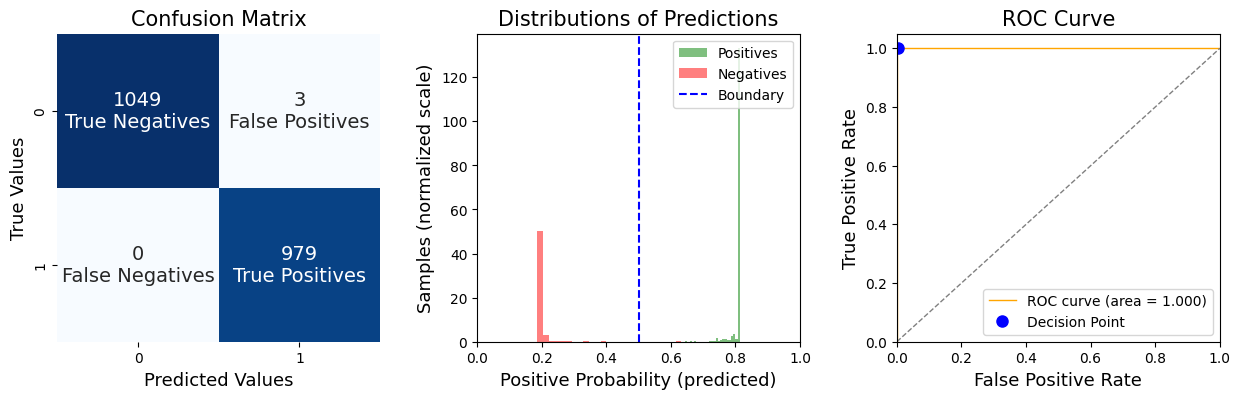

Precision: 0.997 | Recall: 1.0 | F1 Score: 0.998 | AUC: 1.0


In [32]:
y_pred = clf_xgb.predict(X_test[important_features])
y_prob = clf_xgb.predict_proba(X_test[important_features])

sub_auc = binary_performances(y_test, y_prob)



# Final Synopsis

using feature selection by proxy we can subset the features and still get a good model which will be more efficent to use.

from here we can do further feature selection to a lower number until we see performance degrade

we can also take the models and pickle them out for validation with the validation data

if things pan out we can deploy and have this model in production as an api for real time inference on an edge device out produce buyers can use or for batch processing!